In [2]:
!pip install -U transformers
!pip install -U accelerate 
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn

In [3]:
import pandas as pd
from datasets import load_dataset

# Load the emotion dataset directly
emotions = load_dataset("emotion")
emotions

/Users/sithijaseneviratne/Documents/GitHub/NLP-Huggingface-Emotion-Recognition/.venv/lib/python3.14/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [4]:
emotions.set_format(type="pandas") #convert to a dataframe

In [5]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [89]:
emotions['train'][:10] 

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy',
  'ive been feeling a little burdened lately wasnt sure why that was',
  'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny',
  'i feel as confused about life as a teenager or as jaded as a year old man',
  'i have been with petronas for years i feel that petronas has performed well and made a huge profit',
  'i feel romantic too'],
 'label': [0, 0, 3, 2, 3, 0, 5, 4, 1, 2]}

In [7]:
classes = emotions['train'].features['label'].names
classes

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [8]:
df = emotions['train'][:]
df['label_name'] = df['label'].apply(lambda x: classes[x])

In [9]:
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


### DATA ANALYSIS

In [10]:
!pip install matplotlib
import matplotlib.pyplot as plt 

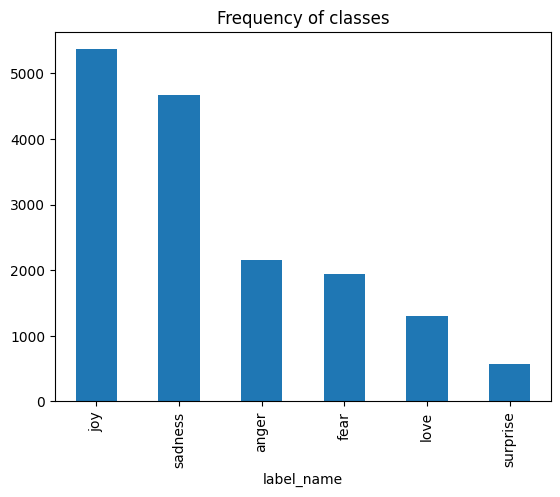

In [11]:
counts_l = df['label_name'].value_counts()
counts_l.plot.bar()
plt.title('Frequency of classes')
plt.show()

<Axes: title={'center': 'Tweet_words'}, xlabel='label_name'>

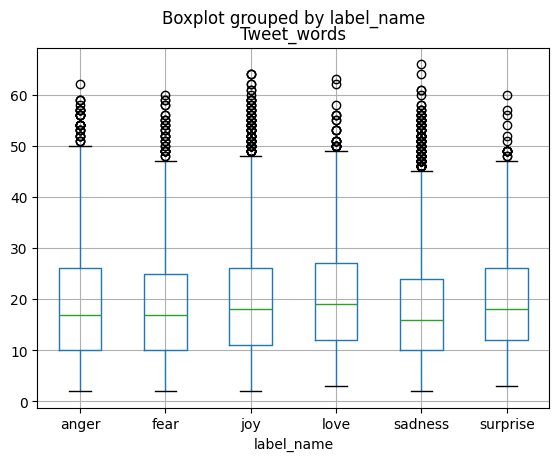

In [12]:
df['Tweet_words'] = df['text'].str.split().apply(len)
df.boxplot('Tweet_words', by='label_name')

### Text to Token 

In [13]:
from transformers import AutoTokenizer
model_tok = "distilbert-base-uncased"
#model taken from huggingface( single case model all to simple) Since the model is DistilBERT (uncased), the tokenizer will lowercase all text and use WordPiece tokenization, breaking words into subword units when needed (e.g., "unbelievable" might become ["un", "##believable"]).
tokenizer = AutoTokenizer.from_pretrained(model_tok)

In [14]:
text = "I love Machine Learning!. Awesome tokenization"
encoded_text = tokenizer(text)
encoded_text
#1 and last tokens CLS AND SEP sentence start and end

{'input_ids': [101, 1045, 2293, 3698, 4083, 999, 1012, 12476, 19204, 3989, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [15]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
tokens
#all simple becuase uncased 

['[CLS]',
 'i',
 'love',
 'machine',
 'learning',
 '!',
 '.',
 'awesome',
 'token',
 '##ization',
 '[SEP]']

In [16]:
tokenizer.vocab_size,tokenizer.model_max_length 

(30522, 512)

In [17]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

Tokenization of Emotion data

In [18]:
emotions.reset_format() #HuggingFace's datasets library works best in its native Arrow/dictionary format 


In [19]:
#tokenization method - map

def tokenize(batch):
  temp = tokenizer(batch['text'], padding=True, truncation=True)
  #padding to make length of the sentences same size - padding and truncate to reduce than 512 tokens
  return temp

print(tokenize(emotions["train"][:2]))
  

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


[1, 1, 1, 1, 1, 1, 1, ...] = 7 ones → 7 real tokens (the actual sentence + [CLS] 101 + [SEP] 102)\
[..., 0, 0, 0, 0] = Rest are zeros → padding tokens to ignore\
because second sentence is longer 23 tokens so it ads paddings\
for bert model maximum tokens is 512\


In [20]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

train set 16,000 examples tokenized , validation and test 2000 each

In [21]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2000
    })
})

<br>

new two columns added input ids with the tokenization ids and the attention mask for real and padding data identify

### Model Building

In [22]:
#sample model
text

'I love Machine Learning!. Awesome tokenization'

In [23]:
inputs = tokenizer(text,return_tensors='pt')
inputs

{'input_ids': tensor([[  101,  1045,  2293,  3698,  4083,   999,  1012, 12476, 19204,  3989,
           102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [25]:
from transformers import AutoModel #or ditilbert model directly
import torch

model=AutoModel.from_pretrained(model_tok)


Loading weights: 100%|██████████| 100/100 [00:00<00:00, 2450.13it/s, Materializing param=transformer.layer.5.sa_layer_norm.weight]   
DistilBertModel LOAD REPORT from: distilbert-base-uncased
Key                     | Status     |  | 
------------------------+------------+--+-
vocab_projector.bias    | UNEXPECTED |  | 
vocab_transform.weight  | UNEXPECTED |  | 
vocab_layer_norm.weight | UNEXPECTED |  | 
vocab_layer_norm.bias   | UNEXPECTED |  | 
vocab_transform.bias    | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [25]:
model


DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): DistilBertSdpaAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): L

In [26]:
with torch.no_grad():#no gradient needed bcs we only want embeddings encode
  outputs=model(**inputs)

last_hidden_states=outputs.last_hidden_state

In [27]:
outputs

BaseModelOutput(last_hidden_state=tensor([[[-0.0570, -0.1866, -0.1039,  ..., -0.0586,  0.2943,  0.4259],
         [ 0.4976,  0.1266, -0.1373,  ...,  0.0422,  0.6450,  0.4862],
         [ 0.7551,  0.6174,  0.5171,  ..., -0.0544,  0.4684,  0.1890],
         ...,
         [-0.3805, -0.1135, -0.1263,  ..., -0.1839, -0.3545,  0.2500],
         [-0.2318, -0.2390, -0.0945,  ..., -0.0925, -0.0505,  0.3570],
         [ 0.9714,  0.1205, -0.4932,  ...,  0.0834, -0.5853, -0.1691]]]), hidden_states=None, attentions=None)

In [28]:
last_hidden_states.shape

torch.Size([1, 11, 768])

### Fine Tuning the model for emotion classification

In [ ]:
#AutoModelForSequenceClassification - for classification tasks, it adds a classification head on top of the base model, which is typically a linear layer that takes the pooled output (the representation of the [CLS] token) and produces logits for each class.
#Other method is using a machine learning algorithms in tthe vectors but then it is not accurate as the model is not trained for classification task but for language understanding and generation.

In [38]:
from transformers import AutoModelForSequenceClassification

num_labels=len(classes)
device=torch.device('cuda' if torch.cuda.is_available() else "cpu")
model = AutoModelForSequenceClassification.from_pretrained(model_tok,num_labels=num_labels).to(device)

Loading weights: 100%|██████████| 100/100 [00:00<00:00, 1663.12it/s, Materializing param=distilbert.transformer.layer.5.sa_layer_norm.weight]   
DistilBertForSequenceClassification LOAD REPORT from: distilbert-base-uncased
Key                     | Status     | 
------------------------+------------+-
vocab_projector.bias    | UNEXPECTED | 
vocab_transform.weight  | UNEXPECTED | 
vocab_layer_norm.weight | UNEXPECTED | 
vocab_layer_norm.bias   | UNEXPECTED | 
vocab_transform.bias    | UNEXPECTED | 
pre_classifier.bias     | MISSING    | 
classifier.weight       | MISSING    | 
pre_classifier.weight   | MISSING    | 
classifier.bias         | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.


In [39]:
device

device(type='cpu')

In [29]:
from transformers import TrainingArguments

In [31]:
batchsize = 64
model_name = "emotion-finetune-distilbert"

training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batchsize,
                                  per_device_eval_batch_size=batchsize,
                                  weight_decay=0.01,
                                  eval_strategy='epoch',
                                  disable_tqdm=False)

In [32]:
# Install scikit-learn for metrics
!pip install scikit-learn

In [33]:

from sklearn.metrics import accuracy_score, f1_score

In [34]:
# Create compute_metrics function
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='weighted')
    return {'accuracy': acc, 'f1': f1}

In [69]:
from transformers import Trainer

trainer = Trainer(model=model,
                  args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset = emotions_encoded['train'],
                  eval_dataset = emotions_encoded['validation'],
                  processing_class=tokenizer)

In [70]:
trainer.train()

/Users/sithijaseneviratne/Documents/GitHub/NLP-Huggingface-Emotion-Recognition/.venv/lib/python3.14/site-packages/torch/utils/data/dataloader.py:775: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  super().__init__(loader)


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.321407,0.912000,0.911068
2,0.555688,0.231170,0.927000,0.926829


/Users/sithijaseneviratne/Documents/GitHub/NLP-Huggingface-Emotion-Recognition/.venv/lib/python3.14/site-packages/torch/utils/data/dataloader.py:775: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  super().__init__(loader)
Writing model shards: 100%|██████████| 1/1 [00:00<00:00,  7.45it/s]
/Users/sithijaseneviratne/Documents/GitHub/NLP-Huggingface-Emotion-Recognition/.venv/lib/python3.14/site-packages/torch/utils/data/dataloader.py:775: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  super().__init__(loader)


TrainOutput(global_step=500, training_loss=0.5556876831054688, metrics={'train_runtime': 538.2696, 'train_samples_per_second': 59.45, 'train_steps_per_second': 0.929, 'total_flos': 720342861696000.0, 'train_loss': 0.5556876831054688, 'epoch': 2.0})

In [71]:
# Save the trained model properly
trainer.save_model(model_name)
tokenizer.save_pretrained(model_name)

Writing model shards: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]


('emotion-finetune-distilbert/tokenizer_config.json',
 'emotion-finetune-distilbert/tokenizer.json')

In [72]:
preds_outputs = trainer.predict(emotions_encoded['test'])
preds_outputs.metrics


/Users/sithijaseneviratne/Documents/GitHub/NLP-Huggingface-Emotion-Recognition/.venv/lib/python3.14/site-packages/torch/utils/data/dataloader.py:775: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  super().__init__(loader)


{'test_loss': 0.2355237454175949,
 'test_accuracy': 0.9135,
 'test_f1': 0.9130378302365899,
 'test_runtime': 5.6526,
 'test_samples_per_second': 353.817,
 'test_steps_per_second': 5.661}

In [73]:
#Plotting confusion matrix to know which classes are creating problems of train set less predicting

import numpy as np
y_preds=np.argmax(preds_outputs.predictions, axis=1)
y_true = emotions_encoded['test'][:]['label']

In [74]:
from sklearn.metrics import classification_report
print(classes)
print(classification_report(y_true, y_preds))

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       581
           1       0.93      0.94      0.93       695
           2       0.76      0.79      0.78       159
           3       0.92      0.92      0.92       275
           4       0.89      0.88      0.89       224
           5       0.78      0.64      0.70        66

    accuracy                           0.91      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.91      0.91      0.91      2000



In [75]:
print(counts_l)

label_name
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64


In [84]:
#doing predictions from model
text="Oh shit "

In [85]:
# Load the saved trained model (fixes MPS memory issue)
from transformers import AutoModelForSequenceClassification
trained_model = AutoModelForSequenceClassification.from_pretrained(model_name).to(device)
trained_model.eval()

input_encoded = tokenizer(text, return_tensors='pt').to(device)
with torch.no_grad():
  output = trained_model(**input_encoded)
  
# Get predicted class
predicted_class = output.logits.argmax(-1).item()
print(f"Text: {text}")
print(f"Predicted emotion: {classes[predicted_class]}")

Loading weights: 100%|██████████| 104/104 [00:00<00:00, 2404.55it/s, Materializing param=pre_classifier.weight]                                  

Text: Oh shit 
Predicted emotion: joy


In [79]:
model_name

'emotion-finetune-distilbert'

In [80]:
text=input("Enter a text to predict emotion: ")